In [1]:
import sys, os
from pathlib import Path
# from html.parser import HTMLParser
import textwrap
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

from tabulate import tabulate
from tqdm.notebook import tqdm
import yfinance as yf
import pandas as pd
# from scipy.optimize import linear_sum_assignment
from thefuzz import fuzz

from src import yahoo


In [2]:
tknames = ['AAPL', 'MSFT', 'NVDA']
# tknames = ['ABI.BR', 'EBS.VI', 'EDP.LS', 'ASML.AS', 'IBE.MC', 'EDPR.LS', 'SAN.MC', 'ENEL.MI', 'OMV.VI', 'ISP.MI', 'MC.PA', 'BBVA.MC', 'KBC.BR', 'VER.VI', 'PRX.AS', 'STLA.MI', 'ENI.MI', 'SAP.DE', 'SIE.DE', 'INGA.AS', 'TTE.PA', 'ALV.DE', 'UCB.BR', 'SAN.PA', 'ARGX.BR', 'UCG.MI', 'OR.PA', 'GALP.LS', 'JMT.LS', 'ADYEN.AS', 'CABK.MC', 'TEF.MC', 'RENE.LS', 'NVG.LS', 'SON.LS', 'REP.MC', 'BAS.DE', 'AD.AS', 'G.MI', 'SU.PA', 'NOS.LS', 'BCP.LS', 'DAI.DE', 'ANDR.VI', 'BG.VI', 'CTT.LS', 'AMS.MC', 'GBLB.BR', 'AENA.MC', 'WIE.VI', 'VOE.VI', 'ALTR.LS', 'DSM.AS', 'SOLB.BR', 'DTE.DE', 'FER.MC', 'AI.PA', 'BNP.PA', 'RACE.MI', 'BAYN.DE', 'DPW.DE', 'COR.LS', 'RBI.VI', 'AIR.PA', 'ITX.MC', 'CNHI.MI', 'PHIA.AS', 'AGS.BR', 'WKL.AS', 'IFX.DE', 'CLNX.MC', 'IIA.VI', 'ADS.DE', 'HEIA.AS', 'MONC.MI', 'REE.MC', 'UMI.BR', 'SOF.BR', 'CS.PA', 'ELE.MC', 'WDP.BR', 'NTGY.MC', 'SRG.MI', 'DG.PA', 'MUV2.DE', 'TRN.MI', 'AKZA.AS', 'KER.PA', 'VNA.DE', 'LNZ.VI', 'ACS.MC', 'EL.PA', 'CAI.VI', 'TKA.VI', 'VOW3.DE', 'POST.VI', 'EXO.MI', 'FBK.MI', 'ATL.MI', 'ACKB.BR', 'RMS.PA', 'GRF.MC', 'ASM.AS', 'NN.AS', 'SGRE.MC', 'BMW.DE', 'PRY.MI', 'RI.PA', 'DB1.DE', 'ENG.MC', 'ELI.BR', 'SEM.LS', 'SPI.VI', 'UQA.VI', 'ATS.VI', 'VIG.VI', 'AED.BR', 'SAF.PA', 'EOAN.DE', 'GVOLT.LS', 'UMG.AS', 'BN.PA', 'COFB.BR', 'MB.MI', 'DIE.BR', 'EVN.VI', 'PST.MI', 'DBK.DE', 'MRK.DE', 'CPR.MI', 'NEXI.MI', 'RWE.DE', 'CAP.PA', 'TEN.MI', 'CCEP.AS', 'SGO.PA', 'KPN.AS', 'PROX.BR', 'REC.MI', 'DSY.PA', 'STM.PA', 'DOC.VI', 'AGN.AS', 'AMP.MI', 'GLE.PA', 'IMCD.AS', 'TIT.MI', 'ML.PA', 'ENGI.PA', 'LR.PA', 'AER.AS', 'EGL.LS', 'TKWY.AS', 'HEIO.AS', 'SHL.DE', 'VIE.PA', 'COLR.BR', 'SBO.VI', 'ORA.PA', 'VGP.BR', 'RAND.AS', 'ABN.AS', 'ZAL.DE', 'MELE.BR', 'DIA.MI', 'FRE.DE', 'PAL.VI', 'TEP.PA', 'INW.MI', 'LIGHT.AS', 'ASRNL.AS', 'BESI.AS', 'SY1.DE', 'AALB.AS', 'TNET.BR', 'DTG.DE', 'HEN3.DE', 'BEKB.BR', 'KBCA.BR', 'PAH3.DE', 'SRT3.DE', 'FME.DE', 'ACA.PA', 'IBS.LS', 'EURN.BR', 'SEM.VI', 'BNR.DE', 'MONT.BR', 'DHER.DE', 'HNR1.DE', 'BAR.BR', 'POS.VI', 'AGR.VI', 'ZAG.VI', 'PUB.PA', '1COV.DE', 'QGEN.DE', 'MTX.DE', 'PUM.DE', 'HFG.DE', 'FACC.VI', 'GIMB.BR', 'CON.DE', 'XIOR.BR', 'HEI.DE', 'ARCAD.AS', 'CFEB.BR', 'ERF.PA', 'NBA.LS', 'PHR.LS', 'BEI.DE', 'LEG.DE', 'FAGR.BR', 'OCI.AS', 'VOW.DE', 'DIM.PA', 'XTSLA.PA', 'BFIT.AS', 'CA.PA', 'SNC.LS', 'ENR.DE', 'WLN.PA', 'CBK.DE', 'KIN.BR', 'INTER.AS', 'XTSLA.MC', 'HEN.DE', 'TWEKA.AS', 'ACCEL.AS', 'REC.BR', 'BEFB.BR', 'PNL.AS', 'EDEN.PA', 'RET.BR', 'RAM.LS', 'SBMO.AS', 'ALO.PA', 'VIV.PA', 'VPK.AS', 'HO.PA', 'KBX.DE', 'JDEP.AS', 'BOKA.AS', 'CRBN.AS', 'G1A.DE', 'URW.PA', 'EVK.DE', 'BPOST.BR', 'AKE.PA', 'TESB.BR', 'INTO.BR', 'KGX.DE', 'ECMPA.AS', 'FGR.PA', 'AFX.DE', 'BVI.PA', 'BAMNB.AS', 'ENX.PA', 'SW.PA', 'AT1.DE', 'AGFB.BR', 'AMG.AS', 'EN.PA', 'ECONB.BR', 'FLOW.AS', 'RNO.PA', 'ALFEN.AS', 'NEM.DE', 'G24.DE', 'GET.PA', 'MITRA.BR', 'NSI.AS', 'LXS.DE', 'BMW3.DE', 'ONTEX.BR', 'VLK.AS', 'BC8.DE', 'IMMO.BR', 'FUR.AS', 'AC.PA', 'FR.PA', 'GFC.PA', 'LHA.DE', 'HTOO.LS', 'TOM2.AS', 'INPST.AS', 'IBAB.BR', 'SHUR.BR', 'SLIGR.AS', 'RAA.DE', 'UN01.DE', 'OBEL.BR', 'VAN.BR', 'PHARM.AS', 'UBI.PA', 'LI.PA', 'UTDI.DE', 'EO.PA', 'WHA.AS', 'BIM.PA', 'RCO.PA', 'BOL.PA', 'AMUN.PA', 'SEV.PA', 'EDF.PA', 'CNP.PA', 'COV.PA', 'ADP.PA', 'SK.PA', 'O2D.DE', 'FPE3.DE', 'FDJ.PA', 'IPN.PA', 'RF.PA', 'CMCOM.AS', 'VASTN.AS', 'MF.PA', 'AM.PA', 'BRNL.AS', 'ORP.PA', 'BSGR.AS', 'FAST.AS', 'FFARM.AS', 'SIFG.AS']

In [3]:
# date = '220208'

In [6]:
full = [yahoo.download(t, pbar=None) for t in tqdm(tknames)]
tickers = {tk.ticker: tk for tk in full}
len(full)

  0%|          | 0/324 [00:00<?, ?it/s]

324

In [7]:
tk = full[0]
tk.ticker

'ABI.BR'

<IPython.core.display.Javascript object>


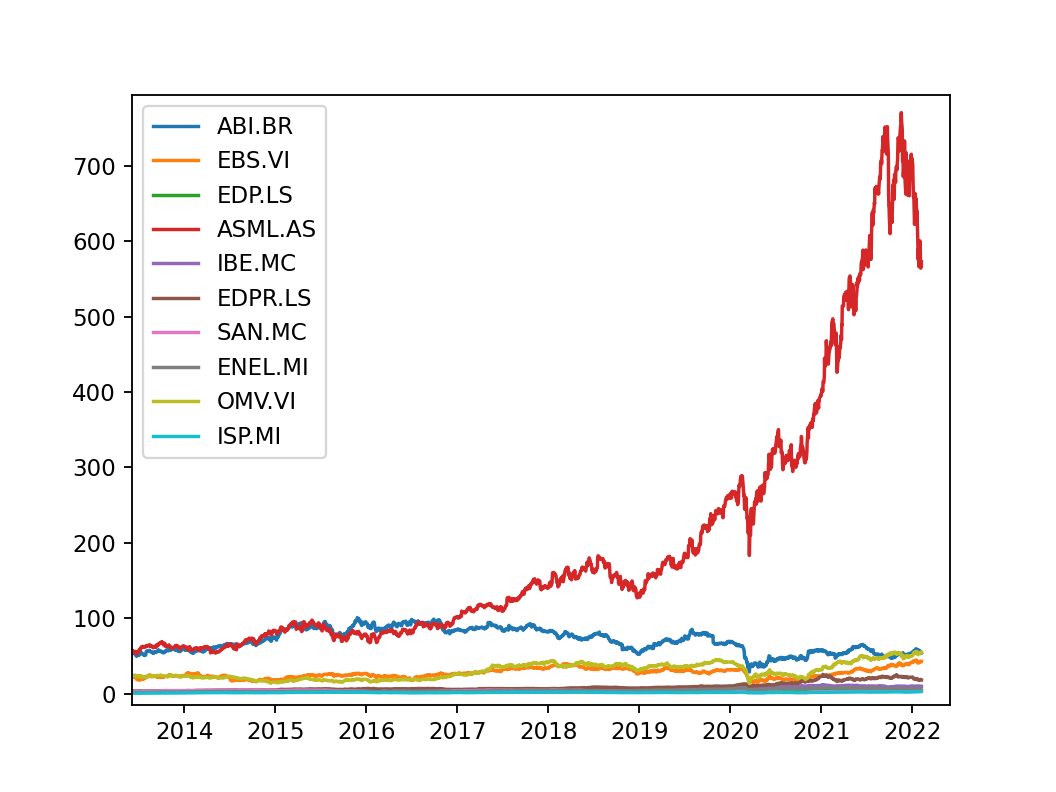

In [9]:
plt.figure()
for tk in full[:10]:
    date_array  = tk.history.index
    price_array = tk.history['Close']
    plt.plot(date_array, price_array, linestyle = 'solid', label=tk.ticker);
plt.legend();

In [15]:
dts = tk.history.index
dts

DatetimeIndex(['1995-03-24', '1995-03-28', '1995-03-31', '1995-04-17',
               '1995-04-25', '1995-05-01', '1995-08-02', '1995-08-03',
               '1995-08-04', '1995-08-07',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', length=6740, freq=None)

In [19]:
sel = dts.year == 2021
sel.sum()

256

In [30]:
tr = full[3].history#['Close']
sel = tr.index.year == 2021
seq = tr[sel]
seq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-01-04,401.802006,408.763922,400.061527,404.039764,789502,0.0,0.0
2021-01-05,404.338116,409.808193,398.967502,404.686218,798787,0.0,0.0
2021-01-06,404.586756,404.984604,397.028128,400.658264,875711,0.0,0.0
2021-01-07,402.597643,405.581321,398.171871,401.702545,874780,0.0,0.0
2021-01-08,411.996243,416.819862,411.150862,413.786438,975243,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-27,700.000000,715.599976,695.400024,713.099976,347324,0.0,0.0
2021-12-28,716.799988,724.500000,711.000000,715.299988,331884,0.0,0.0
2021-12-29,716.000000,716.500000,699.500000,703.500000,313441,0.0,0.0
2021-12-30,709.000000,718.299988,706.200012,710.400024,454118,0.0,0.0


In [31]:
seq.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998529,0.997779,0.995186,-0.232151,0.027338,NaN
High,0.998529,1.000000,0.998059,0.997450,-0.223040,0.028092,NaN
Low,0.997779,0.998059,1.000000,0.998341,-0.258097,0.031462,NaN
Close,0.995186,0.997450,0.998341,1.000000,-0.255399,0.030697,NaN
Volume,-0.232151,-0.223040,-0.258097,-0.255399,1.000000,-0.053355,NaN
Dividends,0.027338,0.028092,0.031462,0.030697,-0.053355,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
tk.history['Close']

1995-03-24    0.365557
1995-03-28    0.373289
1995-03-31    0.376100
1995-04-17    0.386646
1995-04-25    0.377858
                ...   
2022-01-31    2.619500
2022-02-01    2.670000
2022-02-02    2.697000
2022-02-03    2.728000
2022-02-04    2.667000
Name: Close, Length: 6740, dtype: float64

In [4]:
# tk = yf.Ticker('NVDA')
# pd.read_json(tk.recommendations.to_json(orient="split"), orient='split')

In [5]:
full[0].history

TypeError: argument of type 'NoneType' is not iterable